In [1]:
import lsst.meas.astrom as measAstrom
import lsst.daf.base as dafBase
import lsst.pipe.base as pipeBase
import lsst.daf.persistence as dafPersist

import random
import matplotlib.pyplot as plt
import numpy as np

import lsst.afw.display.ds9 as ds9
import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom


import DiaSourceTools as DSTools
import lsst.afw.display.utils as displayUtils
import lsst.meas.algorithms.detection as sDet

%matplotlib inline

/renoir_data_00/fouchez/lsst/DM/stacks/lsstsw/2016-04-04/lsstsw/miniconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_master/"
butler = dafPersist.Butler(DATADIR+"/output")

In [3]:
#visitref = 800719
#visitlist = [800721]
visitref = (845345, 4)
visitlist = [(849373,20), (849686,24), (850180,28), (850586,30+2), (851060,30+6)]


dataId = {'visit': visitref[0], 'filter':'r' , 'ccd':14}
diaSrcref = butler.get("deepDiff_diaSrc", dataId)
Srcref = butler.get("deepDiff_diaSrc", dataId)
schema = diaSrcref.schema
newsrclist=[(diaSrcref,visitref)]
objlist = []

for visit in visitlist:    
    dataId = {'visit': visit[0], 'filter':'r' , 'ccd':14}
    diaSrc= butler.get("deepDiff_diaSrc", dataId)
    match = afwTable.matchRaDec(diaSrcref, diaSrc, afwGeom.Angle(1./3600., afwGeom.degrees))        
    newSrc = afwTable.SourceCatalog(schema)
    print len(match)
    for m in match:
        m.second.setId(m.first.getId())
        newSrc.append(m.second)
        if not(m.first.getId() in objlist):
            objlist.append(m.first.getId())
    newsrclist.append((newSrc,visit))
    print "-----",len(objlist)


80
----- 80
33
----- 98
42
----- 120
88
----- 174
72
----- 210


In [4]:
len(diaSrcref['id'])

1088

In [5]:
newSrc = newSrc.copy(deep=True)

In [6]:
#print newSrc['id']


In [7]:
#newSrc.writeFits("hop.fits")

In [8]:
import sncosmo

In [58]:
def visualize_lightcurve(lightcurve, color='black'):
    """
    Make a simple light curve plot.
    """
    if lightcurve is None:
        raise ValueError('No lightcurve yet. Use build_lightcurve first.')

    fig = sncosmo.plot_lc(lightcurve, color=color)

    return fig


In [10]:
from astropy.table import Table
def build_lightcurve(newSrcList,objid):
    """
    Assemble a light curve data table from available files.
    """
        
    bandpasses = ['r']
    visit_list = ['800719']
        
    lightcurve = {}
    lightcurve['bandpass'] = []
    lightcurve['mjd'] = []
    lightcurve['ra'] = []
    lightcurve['dec'] = []
    lightcurve['flux'] = []
    lightcurve['flux_error'] = []
    lightcurve['zp'] = []
    lightcurve['zpsys'] = []

    for bandpass in bandpasses:
        #for visit in self.visit_list:
        for (newSrc,visit) in newSrcList:    
            #dataId = {'visit': visit, 'filter':bandpass , 'ccd':14}
            #print visit
            for src in newSrc:
                if (src['id'] == objid):
                    #print 'yep',visit
                    lightcurve['bandpass'].append(str('sdss' + bandpass))
                    lightcurve['mjd'].append(visit[1])
                    lightcurve['ra'].append(src['coord_ra'])
                    lightcurve['dec'].append(src['coord_dec'])
                    lightcurve['flux'].append(src['base_PeakLikelihoodFlux_flux'])
                    lightcurve['flux_error'].append(src['base_PeakLikelihoodFlux_fluxSigma'])
                    #lightcurve['flux'].append(src['base_CircularApertureFlux_12_0_flux'])
                    #lightcurve['flux_error'].append(src['base_CircularApertureFlux_12_0_fluxSigma'])
                    lightcurve['zp'].append(25.0)
                    lightcurve['zpsys'].append('ab')
    lightcurve = Table(data=lightcurve)
    return lightcurve    



In [11]:
i=0
lclist=[]
print len(objlist)
for obj in objlist:
    i = i+1
    print i
    lc = build_lightcurve(newsrclist,obj)
    if len(lc)>1:
        lclist.append(lc)


210
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210


311.523674027 214.638061051 52.6953677399
394.383602475 214.606019572 52.6990125613
260.666428387 214.64431636 52.7093814609
190.465723948 214.723424191 52.7095343888
122.240143333 214.721526003 52.7309775686
206.161604805 214.756360861 52.7527182219
0.808085635419 214.699447557 52.756559485
249.084526123 214.630076637 52.7590074419
240.301186186 214.645377351 52.7960301811
234.79428766 214.652487718 52.8020734943
379.340620529 214.6131451 52.817358513
269.508626484 214.709772798 52.8306991792
277.596911445 214.714311741 52.8322023945
378.109162916 214.63440269 52.8392235317
259.197551368 214.646723634 52.7073120358
174.305101934 214.736436154 52.725605355
215.253260722 214.753683999 52.7318987479
222.936350474 214.637299481 52.7560890132
237.871228416 214.634125376 52.7678999613
176.339677889 214.703101242 52.8054121329
362.578415847 214.614366809 52.8108316889
256.024910586 214.684526801 52.8261653039


/renoir_data_00/fouchez/lsst/DM/stacks/lsstsw/2016-04-04/lsstsw/miniconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


300.304885178 214.698462237 52.8399971014
391.90394846 214.639469404 52.8475789061
236.624239399 214.665960931 52.6998917719
196.918277654 214.672179103 52.7090368316
26


mjd,zpsys,flux,ra,flux_error,dec,zp,bandpass
int64,str2,float64,object,float64,object,float64,str5
4,ab,-4371.88118265,3.74668 rad,882.365475627,0.923617 rad,25.0,sdssr
36,ab,-1468.84654816,3.74668 rad,1075.55866986,0.923616 rad,25.0,sdssr


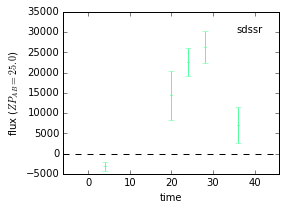

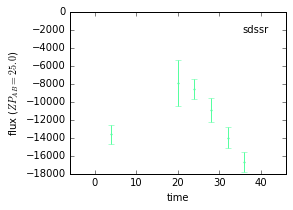

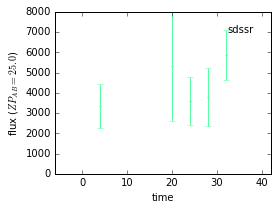

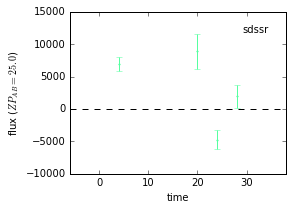

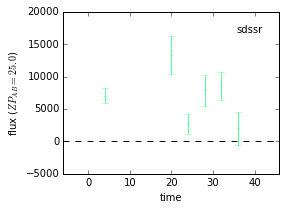

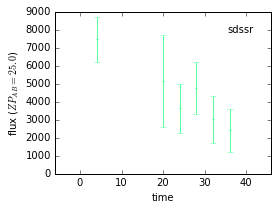

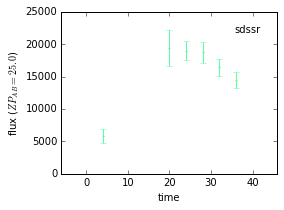

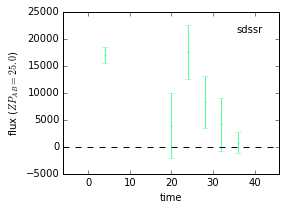

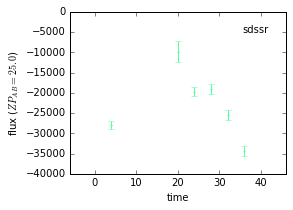

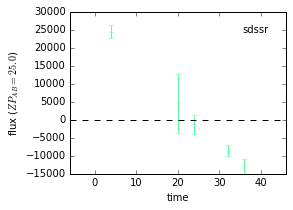

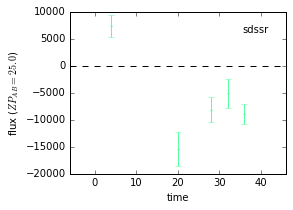

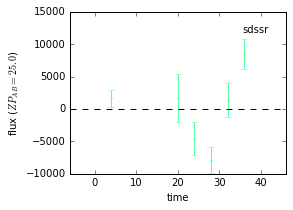

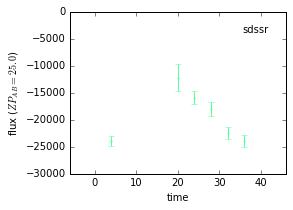

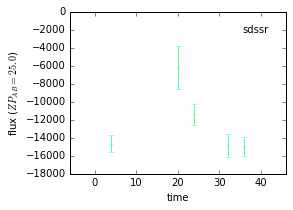

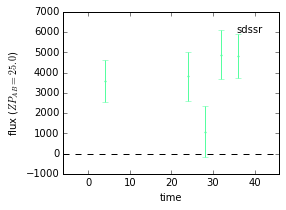

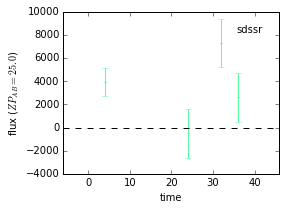

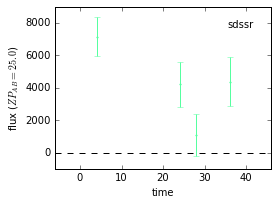

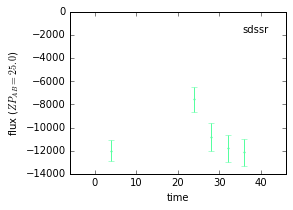

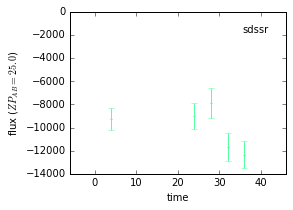

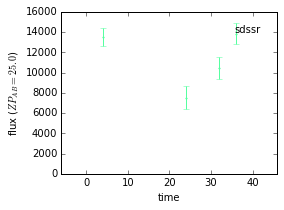

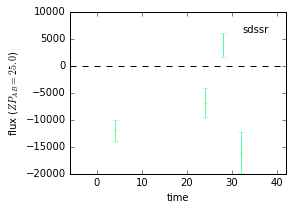

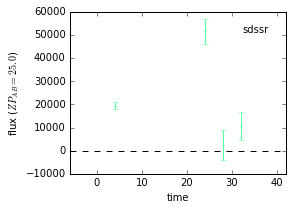

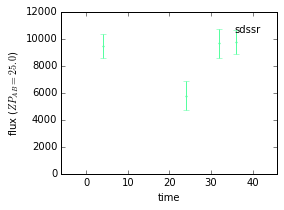

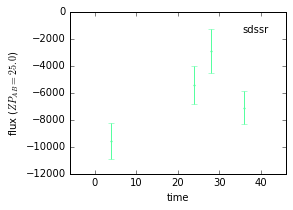

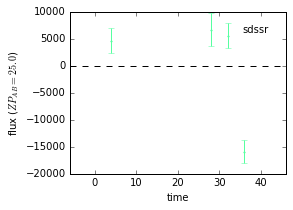

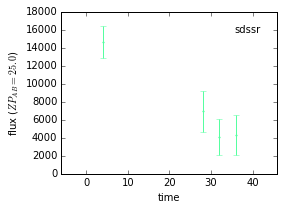

In [12]:
i=0
import math
for lc in lclist:
    #print len(lc)
    if len(lc)>3:
        i=i+1
        dra = float(lc['ra'][0])-3.7472052
        ddec = float(lc['dec'][0])-0.92077529
        print math.sqrt(dra*dra+ddec*ddec)/3.14159*180*3600,float(lc['ra'][0])/3.14159*180,float(lc['dec'][0])/3.14159*180
        visualize_lightcurve(lc)
print i 
lc   

In [13]:
import lsst.afw.geom as afwGeom
import lsst.afw.display.utils as displayUtils
import matplotlib.pyplot as plt
import numpy as np
import lsst.afw.table as afwTable
from lsst.meas.algorithms.detection import SourceDetectionTask
import lsst.meas.algorithms.detection as sDet

def get_time_mosaic(butler, dataid_list, source, frame=1):
    mosaic = displayUtils.Mosaic(gutter=5, background=3, mode="x")
    
    
    
    for dataid in dataid_list:
        
        mosaic_temp = displayUtils.Mosaic(gutter=0, background=0, mode="y")
        
        diffExp = butler.get("deepDiff_differenceExp", dataid)
        sciExp  = butler.get("calexp", dataid)
        tmpExp = butler.get("deepDiff_warpedExp", dataid)
        bgConf = sDet.BackgroundConfig()
        background,tmpExp = sDet.estimateBackground(tmpExp,bgConf,True)
        
        s1 = get_stamp(source, sciExp)
        s2 = get_stamp(source, tmpExp)
        s3 = get_stamp(source, diffExp)
        
        mosaic_temp.append(s1.getMaskedImage())
        mosaic_temp.append(s2.getMaskedImage())
        mosaic_temp.append(s3.getMaskedImage())
        m = mosaic_temp.makeMosaic(frame=None, display=None).clone()
        mosaic.append(m)
        
    mosaic.makeMosaic(frame=frame, title="time mosaic")

def get_stamp(source, exposure, offset=10):

    
    bbox = source.getFootprint().getBBox()
    mos = displayUtils.Mosaic()
                
    sourceRa = source.getRa()
    sourceDec = source.getDec()

    wcs = exposure.getWcs()
    mos = displayUtils.Mosaic()


    Center = afwGeom.Point2I(wcs.skyToPixel(sourceRa, sourceDec))

    Begin = afwGeom.Point2D(Center.getX() - bbox.getHeight()/2., Center.getY() - bbox.getHeight()/2.)
    Begin = afwGeom.Point2I(Begin)
    End = afwGeom.Point2D(Center.getX() + bbox.getHeight()/2., Center.getY() + bbox.getHeight()/2.)
    End = afwGeom.Point2I(End)



    ExpOrig = afwGeom.Point2I(exposure.getX0()-1, exposure.getY0()-1)



    correctedBegin = Begin- ExpOrig
    correctedEnd = End - ExpOrig

    correctedBegin= afwGeom.Point2I(correctedBegin.getX()-offset,correctedBegin.getY()-offset )
    correctedEnd = afwGeom.Point2I(correctedEnd.getX()+offset,correctedEnd.getY()+offset )
    bboxT = afwGeom.Box2I(correctedBegin,correctedEnd) 

    #print bboxT.toString
    return exposure.Factory(exposure,bboxT, True)


In [14]:
source = Srcref[140]
dataId = {'visit': visitref[0], 'filter':'r' , 'ccd':14}
dataid_list=[dataId]
for visit in visitlist:
    print visit[0]
    dataId = {'visit': visit[0], 'filter':'r' , 'ccd':14}
    dataid_list.append(dataId)

get_time_mosaic(butler, dataid_list, source, frame=1)

849373
849686
850180
850586
851060


In [15]:
i=0
import math
for lc in lclist:
    #print len(lc)
    if len(lc)>3:
        i=i+1
        ra = float(lc['ra'][0])
        dec =  float(lc['dec'][0])
        for s in Srcref:
            r=math.sqrt((float(s['coord_ra'])-ra)**2+(float(s['coord_dec'])-dec)**2)/3.14159*180*3600
            if (r<1) : 
                get_time_mosaic(butler, dataid_list, s, frame=i) 
                
print i 
lc   

26


mjd,zpsys,flux,ra,flux_error,dec,zp,bandpass
int64,str2,float64,object,float64,object,float64,str5
4,ab,-4371.88118265,3.74668 rad,882.365475627,0.923617 rad,25.0,sdssr
36,ab,-1468.84654816,3.74668 rad,1075.55866986,0.923616 rad,25.0,sdssr


In [18]:
print len(Srcref)

1088


In [65]:
candidates = []
i=0
for lc in lclist:
    #print len(lc)
    if len(lc)>3:
        i=i+1
        ra = float(lc['ra'][0])
        dec =  float(lc['dec'][0])
        for s in Srcref:
            r=math.sqrt((float(s['coord_ra'])-ra)**2+(float(s['coord_dec'])-dec)**2)/3.14159*180*3600
            if (r<1) : 
                candidates.append(s)

In [66]:
for c in candidates:
    print c.getRa(), c.getDec()

3.74614 rad 0.919707 rad
3.74558 rad 0.919771 rad
3.74625 rad 0.919951 rad
3.74763 rad 0.919954 rad
3.74759 rad 0.920328 rad
3.7482 rad 0.920708 rad
3.74721 rad 0.920775 rad
3.746 rad 0.920818 rad
3.74627 rad 0.921464 rad
3.74639 rad 0.921569 rad
3.7457 rad 0.921836 rad
3.74739 rad 0.922069 rad
3.74747 rad 0.922095 rad
3.74607 rad 0.922218 rad
3.74629 rad 0.919915 rad
3.74785 rad 0.920235 rad
3.74816 rad 0.920344 rad
3.74612 rad 0.920767 rad
3.74607 rad 0.920973 rad
3.74727 rad 0.921628 rad
3.74572 rad 0.921722 rad
3.74695 rad 0.92199 rad
3.74719 rad 0.922231 rad
3.74616 rad 0.922363 rad
3.74662 rad 0.919786 rad
3.74673 rad 0.919945 rad


In [67]:
dataId = dataid_list[4]
final = []
print dataId
diffExp = butler.get("deepDiff_differenceExp", dataId)
i = 0
for c in candidates:
    stamp = DSTools.get_stamp(c, diffExp)
    stamp_clone = stamp.clone()
    
    results = DSTools.detect_diasources(stamp_clone, doSmooth=True)
    negFps = len(results.fpSets.negative.getFootprints())
    posFps = len(results.fpSets.positive.getFootprints())
    pos_flux_at_25 = get_flux_percentage_at(stamp)
    neg_flux_at_25 = get_flux_percentage_at(stamp, plane_mask="DETECTED_NEGATIVE")
  
    if negFps == 0:
        DSTools.get_time_mosaic(butler, dataid_list, c, frame=i)
        final.append(c)
        i+=1

{'filter': 'r', 'ccd': 14, 'visit': 850586}
ds9 doesn't appear to be running (XPA: XPA returned NULL, (;iconify no; raise)), I'll try to exec it for you


In [64]:
candidates

[]

In [49]:
f = final[-1]
f['coord_ra']

3.74719 rad

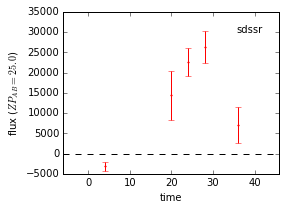

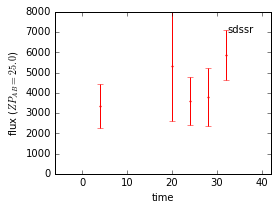

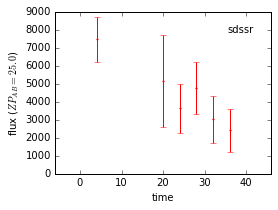

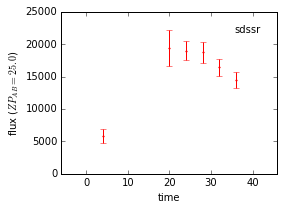

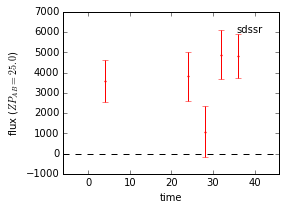

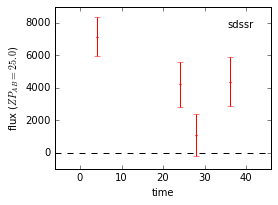

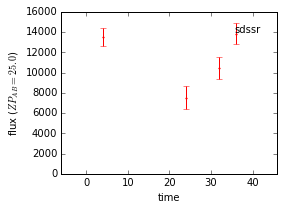

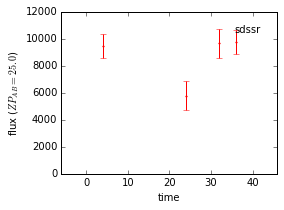

In [59]:
candidates = []
i=0
for lc in lclist:
    #print len(lc)
    if len(lc)>3:
        i=i+1
        ra = float(lc['ra'][0])
        dec =  float(lc['dec'][0])
        for f in final:
            r=math.sqrt((float(f['coord_ra'])-ra)**2+(float(f['coord_dec'])-dec)**2)/3.14159*180*3600
            if (r<1) :
                visualize_lightcurve(lc, color='red')

In [55]:
sncosmo.plot_lc??

In [24]:
def get_flux_percentage_at(stamp, percent = 0.25, plane_mask="DETECTED", positive=True):
    
    cumsum = DSTools.get_cumulative_flux(stamp, plane_mask=plane_mask, positive=positive)
    
    if cumsum is None:
        return None
    
    total = float(len(cumsum))
    
    for i, value in enumerate(cumsum):
        #print i, float(i+1)/total, 1-value
        if float(i+1)/total > (1-percent):
            return 1-value